In [1]:
import tensorflow as tf

In [2]:
w = tf.Variable(2.)

    - 임의로 2*w^2+5 식에 대하여 w로 미분

In [3]:
def f(w):
    y = w**2
    z = 2*y+5
    return z

In [4]:
with tf.GradientTape() as tape:
    z = f(w)
    
gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


    -> 자동 미분 기능 ( tape_gradient() )

### 자동 미분을 이용한 선형 회귀 구현

In [5]:
w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [6]:
@tf.function

def hypothesis(x):
    return w*x +b

In [7]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [12]:
# 평균 제곱 오차 손실함수로 정의

@tf.function

def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred-y))

In [13]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [14]:
optimizer = tf.optimizers.SGD(0.01)

In [15]:
# 300번의 경사하강법

for i in range(301):
    with tf.GradientTape() as tape:
        y_pred = hypothesis(x)
        cost = mse_loss(y_pred,y)
        
    gradients = tape.gradient(cost, [w,b])
    optimizer.apply_gradients(zip(gradients, [w,b]))
    
    if i%10==0:
        print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))
        

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [17]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


### keras로 Linear Regression

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [22]:
model = Sequential()

In [27]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

Epoch 1/300


C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 193ms/step - loss: 3470.3149 - mse: 3470.3149
Epoch 2/300
1/1 [==============================] - 0s 4ms/step - loss: 428.0477 - mse: 428.0477
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 53.7186 - mse: 53.7186
Epoch 4/300
1/1 [==============================] - 0s 4ms/step - loss: 7.6593 - mse: 7.6593
Epoch 5/300
1/1 [==============================] - 0s 3ms/step - loss: 1.9910 - mse: 1.9910
Epoch 6/300
1/1 [==============================] - 0s 4ms/step - loss: 1.2926 - mse: 1.2926
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 1.2057 - mse: 1.2057
Epoch 8/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1940 - mse: 1.1940
Epoch 9/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1917 - mse: 1.1917
Epoch 10/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1904 - mse: 1.1904
Epoch 11/300
1/1 [==============================] - 0s 3ms/step - loss: 1.189

1/1 [==============================] - 0s 4ms/step - loss: 1.1280 - mse: 1.1280
Epoch 90/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1274 - mse: 1.1274
Epoch 91/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1269 - mse: 1.1269
Epoch 92/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1263 - mse: 1.1263
Epoch 93/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1258 - mse: 1.1258
Epoch 94/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1252 - mse: 1.1252
Epoch 95/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1247 - mse: 1.1247
Epoch 96/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1242 - mse: 1.1242
Epoch 97/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1237 - mse: 1.1237
Epoch 98/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1231 - mse: 1.1231
Epoch 99/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1226 - ms

1/1 [==============================] - 0s 4ms/step - loss: 1.0932 - mse: 1.0932
Epoch 177/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0929 - mse: 1.0929
Epoch 178/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0926 - mse: 1.0926
Epoch 179/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0923 - mse: 1.0923
Epoch 180/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0921 - mse: 1.0921
Epoch 181/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0918 - mse: 1.0918
Epoch 182/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0916 - mse: 1.0916
Epoch 183/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0913 - mse: 1.0913
Epoch 184/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0910 - mse: 1.0910
Epoch 185/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0908 - mse: 1.0908
Epoch 186/300
1/1 [==============================] - 0s 4ms/step - loss: 1

1/1 [==============================] - 0s 4ms/step - loss: 1.0761 - mse: 1.0761
Epoch 264/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0760 - mse: 1.0760
Epoch 265/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0759 - mse: 1.0759
Epoch 266/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0757 - mse: 1.0757
Epoch 267/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0756 - mse: 1.0756
Epoch 268/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0755 - mse: 1.0755
Epoch 269/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0754 - mse: 1.0754
Epoch 270/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0752 - mse: 1.0752
Epoch 271/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0751 - mse: 1.0751
Epoch 272/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0750 - mse: 1.0750
Epoch 273/300
1/1 [==============================] - 0s 4ms/step - loss: 1

1/1 [==============================] - 0s 47ms/step


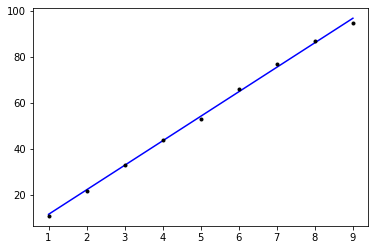

In [28]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [29]:
print(model.predict([9.5]))

1/1 [==============================] - 0s 45ms/step
[[102.176056]]


     -> 9시간 30분을 공부하면 약 102.1점을 얻는다고 예측하고 있음